# 📊 Healthplan insurance cost Analysis

**Author:** TAIF_ AYA : Data Analyst

This notebook presents an end‑to‑end Healthplan insurance cost analysis, designed for clarity, reproducibility, and GitHub presentation.

## 1. Project Objective
The goal is to analyze customer behavior and identify key factors contributing to the cost, enabling data‑driven retention strategies.

# <u>**HealthPlan Insights: Understanding U.S. Health Insurance Coverage**</u>

**<u>Prediction the price (premium/rate) an individual will pay for a health insurance plan in the US.</u>**

<u>Project outline (high level)</u>

 - Understand data and choose target variable (detect candidate target like Rate, IndividualRate, Premium, etc.).

 - Exploratory Data Analysis (EDA): shapes, column types, missing values, value distributions, correlations.

 - Data cleaning: fix data types, drop/merge columns, handle missing values.

 - Feature engineering: derive features (age groups, metal tier, family vs individual, network size, plan type), reduce cardinality.

 - Preprocessing pipeline: numeric imputation + scaling, categorical imputation + encoding (OHE or target encoding).

 - Modeling: baseline, linear regression, tree-based models (RandomForest, XGBoost if available). Evaluate with RMSE, MAE, R², and cross-validation.

 - Model interpretation: feature importances, partial dependence, errors analysis.

 - Production: save the pipeline, create inference function, basic report.

 - Next: hyperparameter tuning, advanced feature engineering, fairness checks.

**<u>Step 0: Install (only if needed)**</u>

### 🔎 Analysis Step
Explanation of the following code, its purpose, and interpretation of results.

In [2]:
# Run once if you need extra libs (on Colab or local)
!pip install scikit-learn pandas matplotlib seaborn joblib xgboost

**<u>Step 1: Load files and inspect</u>**

### 🔎 Analysis Step
Explanation of the following code, its purpose, and interpretation of results.

In [4]:
import pandas as pd
import numpy as np
import os

paths = {
    "benefits": r"C:\Users\HP\Downloads\HealthPlan Insights Understanding U.S. Health Insurance Coverage\HealthPlan Insights Understanding U.S. Health Insurance Coverage\BenefitsCostSharing_clean.csv",
    "network": r"C:\Users\HP\Downloads\HealthPlan Insights Understanding U.S. Health Insurance Coverage\HealthPlan Insights Understanding U.S. Health Insurance Coverage\Network2.csv",
    "rates": r"C:\Users\HP\Downloads\HealthPlan Insights Understanding U.S. Health Insurance Coverage\HealthPlan Insights Understanding U.S. Health Insurance Coverage\ratemerged.csv"
}

for k,p in paths.items():
    print(k, "exists?", os.path.exists(p), "->", p)

# Load (if files are big you can pass nrows=... to inspect)
rates = pd.read_csv(paths['rates'], low_memory=False)
benefits = pd.read_csv(paths['benefits'], low_memory=False)
network = pd.read_csv(paths['network'], low_memory=False)

# Quick look
print("rates shape:", rates.shape)
print(rates.columns[:40].tolist())
display(rates.head(8))


benefits exists? True -> C:\Users\HP\Downloads\HealthPlan Insights Understanding U.S. Health Insurance Coverage\HealthPlan Insights Understanding U.S. Health Insurance Coverage\BenefitsCostSharing_clean.csv
network exists? True -> C:\Users\HP\Downloads\HealthPlan Insights Understanding U.S. Health Insurance Coverage\HealthPlan Insights Understanding U.S. Health Insurance Coverage\Network2.csv
rates exists? True -> C:\Users\HP\Downloads\HealthPlan Insights Understanding U.S. Health Insurance Coverage\HealthPlan Insights Understanding U.S. Health Insurance Coverage\ratemerged.csv
rates shape: (680180, 18)
['BusinessYear', 'StateCode', 'IssuerId', 'PlanId', 'Tobacco', 'Age', 'IndividualRate', 'IndividualTobaccoRate', 'Couple', 'PrimarySubscriberAndOneDependent', 'PrimarySubscriberAndTwoDependents', 'PrimarySubscriberAndThreeOrMoreDependents', 'CoupleAndOneDependent', 'CoupleAndTwoDependents', 'CoupleAndThreeOrMoreDependents', 'StandardComponentId', 'MetalLevel', 'PlanMarketingName']


,BusinessYear,StateCode,IssuerId,PlanId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,StandardComponentId,MetalLevel,PlanMarketingName
0,2014-01-01,GA,83502,83502GA0010001,No Preference,37,999999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83502GA0010001,High,BEST Life Child Dental Plus
1,2014-01-01,LA,78461,78461LA0010002,No Preference,32,999999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78461LA0010002,Low,BEST Life Child Dental
2,2014-01-01,UT,42757,42757UT0020001,No Preference,49,999999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42757UT0020001,High,BESTOne Child Dental Plus
3,2014-01-01,PA,71933,71933PA0020001,No Preference,50,999999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71933PA0020001,High,BESTOne Child Dental Plus
4,2014-01-01,SD,61214,61214SD0010001,No Preference,60,999999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61214SD0010001,High,BEST Life Child Dental Plus
5,2014-01-01,AL,12538,12538AL0010002,No Preference,46,999999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12538AL0010002,Low,BEST Life Child Dental
6,2014-01-01,MO,29416,29416MO0020001,No Preference,55,999999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29416MO0020001,High,BESTOne Child Dental Plus
7,2014-01-01,MI,35700,35700MI0020001,No Preference,64,999999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35700MI0020001,High,BESTOne Child Dental Plus


**<u>Step2: Find a plausible target column automatically</u>**

### 🔎 Analysis Step
Explanation of the following code, its purpose, and interpretation of results.

In [5]:
def detect_target(df):
    keywords = ["rate","premium","price","monthly","individual_rate","individualrate","totalpremium","premium_amount"]
    for kw in keywords:
        for c in df.columns:
            if kw in c.lower():
                if pd.api.types.is_numeric_dtype(df[c]):
                    return c
    # fallback: highest-variance numeric column
    numerics = df.select_dtypes(include=[np.number]).columns
    if len(numerics):
        return df[numerics].var().sort_values(ascending=False).index[0]
    return None

target = detect_target(rates)
print("Detected target column:", target)


Detected target column: IndividualRate


**<u>Step 3: EDA — missing values, distributions, cardinalities</u>**

### 🔎 Analysis Step
Explanation of the following code, its purpose, and interpretation of results.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MetalLevel,680180,7,Silver,165705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrimarySubscriberAndTwoDependents,680180.0,NaN,NaN,NaN,0.17968,4.326008,0.0,0.0,0.0,0.0,248.11
IndividualRate,680180.0,NaN,NaN,NaN,5457.535196,71311.91592,0.0,35.52,303.26,487.77,999999.0
IndividualTobaccoRate,680180.0,NaN,NaN,NaN,243.313794,336.976268,0.0,0.0,0.0,420.48,6383.87
BusinessYear,680180,3,2015-01-01,265200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrimarySubscriberAndOneDependent,680180.0,NaN,NaN,NaN,0.123566,2.956686,0.0,0.0,0.0,0.0,169.65
CoupleAndOneDependent,680180.0,NaN,NaN,NaN,0.185778,4.522397,0.0,0.0,0.0,0.0,260.85
StandardComponentId,680180,15780,23891TX0020004,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlanMarketingName,680180,7439,EHB Low Passive,7174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tobacco,680180,2,No Preference,368933,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,missing_count,missing_pct
BusinessYear,0,0.0
StateCode,0,0.0
MetalLevel,0,0.0
StandardComponentId,0,0.0
CoupleAndThreeOrMoreDependents,0,0.0
CoupleAndTwoDependents,0,0.0
CoupleAndOneDependent,0,0.0
PrimarySubscriberAndThreeOrMoreDependents,0,0.0
PrimarySubscriberAndTwoDependents,0,0.0
PrimarySubscriberAndOneDependent,0,0.0


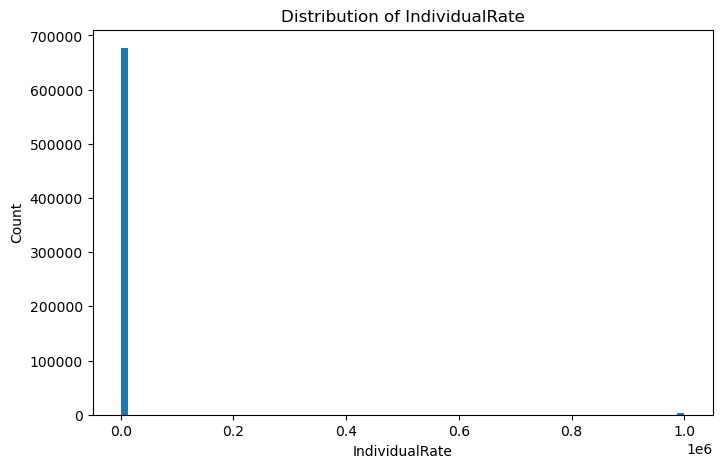

,n_unique
PlanId,15780
StandardComponentId,15780
PlanMarketingName,7439
Age,47
StateCode,39
MetalLevel,7
BusinessYear,3
Tobacco,2


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Basic stats (safe sampling)
# -----------------------------
desc = rates.describe(include='all').T
display(desc.sample(min(20, len(desc))))

# -----------------------------
# Missing value summary
# -----------------------------
mv = rates.isnull().sum().sort_values(ascending=False)
mv_df = pd.DataFrame({
    'missing_count': mv,
    'missing_pct': mv / len(rates) * 100
})
display(mv_df.head(40))

# -----------------------------
# Numeric histogram for target
# -----------------------------
col = target  # make sure `target` is defined
plt.figure(figsize=(8, 5))
plt.hist(rates[col].dropna(), bins=80)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

# -----------------------------
# Cardinality for categorical columns
# -----------------------------
cat_cols = rates.select_dtypes(include=['object', 'category']).columns.tolist()

card = {
    c: rates[c].nunique(dropna=True)
    for c in cat_cols
}

card_df = (
    pd.DataFrame.from_dict(card, orient='index', columns=['n_unique'])
      .sort_values('n_unique', ascending=False)
      .head(50)
)

display(card_df)
